In [16]:
import pandas as pd
#loading csv
new = pd.read_csv('CSEResults.csv',names=['USN','GPA_new'])
old= pd.read_csv('data_all350.csv',names=['USN','GPA_old'])

In [19]:
#data clean up(removing TAL) ignore top in decirbe as it is sorting the usn and not the gpa
old = old[old.GPA_old != 'TAL']
new = new[new.GPA_new != 'TAL']
print(old.describe())
print(new.describe())

                 USN GPA_old
count            350     350
unique           350     123
top     01FB14ECS267    8.45
freq               1      10
                 USN GPA_new
count            351     351
unique           351     120
top     01FB14ECS267    8.86
freq               1      13


In [30]:
#doing join based on usn
total_data = pd.merge(old,new,on='USN')
total_data['GPA_new'] = total_data['GPA_new'].apply(float)
total_data['GPA_old'] = total_data['GPA_old'].apply(float)
print(total_data.sample())

             USN  GPA_old  GPA_new
79  01FB14ECS190     8.82     9.05


In [32]:
#creating a new column with difference
total_data['diff'] = total_data['GPA_new'] - total_data['GPA_old']
print(total_data.sample())

             USN  GPA_old  GPA_new  diff
85  01FB14ECS032     8.73     8.86  0.13


In [34]:
#printing top 20 gainers
print(total_data.nlargest(20,'diff'))

              USN  GPA_old  GPA_new  diff
342  01FB14ECS112     2.06     3.56  1.50
326  01FB15ECS408     4.32     5.77  1.45
341  01FB14ECS036     2.10     3.15  1.05
296  01FB14ECS174     6.00     7.00  1.00
248  01FB15ECS432     6.68     7.55  0.87
226  01FB14ECS157     7.09     7.91  0.82
260  01FB14ECS016     6.55     7.32  0.77
282  01FB14ECS127     6.23     7.00  0.77
204  01FB14ECS051     7.32     8.05  0.73
217  01FB14ECS219     7.18     7.91  0.73
297  01FB14ECS249     6.00     6.73  0.73
198  01FB14ECS116     7.45     8.18  0.73
238  01FB14ECS301     6.86     7.59  0.73
220  01FB14ECS067     7.14     7.86  0.72
285  01FB15ECS404     6.23     6.95  0.72
312  01FB14ECS142     5.55     6.27  0.72
325  01FB14ECS092     4.36     5.05  0.69
263  01FB15ECS438     6.55     7.23  0.68
284  01FB14ECS259     6.23     6.91  0.68
314  01FB15ECS418     5.32     6.00  0.68


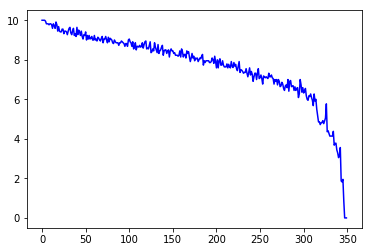

In [37]:
#graphing general gpa trend
import matplotlib.pyplot as plt

plt.plot([g for g in range(len(total_data['GPA_new']))],total_data['GPA_new'], color='b')
plt.show()

Fequency of difference in GPA


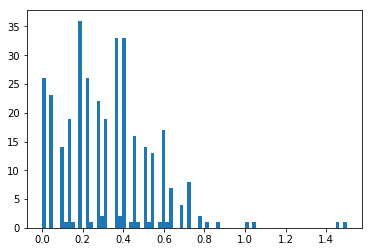

Frequency of New GPA


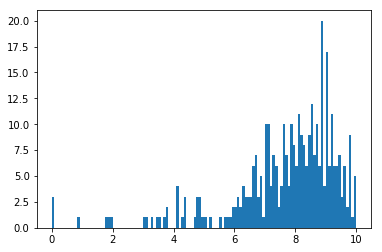

Frequency of Old GPA


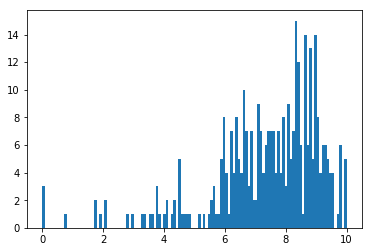

In [48]:
#graphing number of people at each gpa and difference
print('Fequency of difference in GPA')
plt.hist(total_data['diff'],len(total_data.groupby('diff').count().GPA_new))
plt.show()
print('Frequency of New GPA')
plt.hist(total_data['GPA_new'],120)
plt.show()
print('Frequency of Old GPA')
plt.hist(total_data['GPA_old'],123)
plt.show()

